# Project Description
This data was extracted from the 1994 Census bureau database by Ronny Kohavi and Barry Becker (Data Mining and Visualization, Silicon Graphics). A set of reasonably clean records was extracted using the following conditions: ((AAGE>16) && (AGI>100) && (AFNLWGT>1) && (HRSWK>0)). The prediction task is to determine whether a person makes over $50K a year.
Description of fnlwgt (final weight)
The weights on the Current Population Survey (CPS) files are controlled to independent estimates of the civilian non-institutional population of the US. These are prepared monthly for us by Population Division here at the Census Bureau. We use 3 sets of controls. These are:
1.	A single cell estimate of the population 16+ for each state.
2.	Controls for Hispanic Origin by age and sex.
3.	Controls by Race, age and sex.
We use all three sets of controls in our weighting program and "rake" through them 6 times so that by the end we come back to all the controls we used. The term estimate refers to population totals derived from CPS by creating "weighted tallies" of any specified socio-economic characteristics of the population. People with similar demographic characteristics should have similar weights. There is one important caveat to remember about this statement. That is that since the CPS sample is actually a collection of 51 state samples, each with its own probability of selection, the statement only applies within state.


In [1]:
# Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Loading dataset
df=pd.read_csv('census_income.csv')
df

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32556,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32557,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32558,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [3]:
# Dimension of data
print('Rows : {} Columns : {}'.format(df.shape[0],len(df.columns)))

Rows : 32560 Columns : 15


In [4]:
# dataset info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32560 entries, 0 to 32559
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Age             32560 non-null  int64 
 1   Workclass       32560 non-null  object
 2   Fnlwgt          32560 non-null  int64 
 3   Education       32560 non-null  object
 4   Education_num   32560 non-null  int64 
 5   Marital_status  32560 non-null  object
 6   Occupation      32560 non-null  object
 7   Relationship    32560 non-null  object
 8   Race            32560 non-null  object
 9   Sex             32560 non-null  object
 10  Capital_gain    32560 non-null  int64 
 11  Capital_loss    32560 non-null  int64 
 12  Hours_per_week  32560 non-null  int64 
 13  Native_country  32560 non-null  object
 14  Income          32560 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [5]:
# Datatypes in dataset
df.dtypes

Age                int64
Workclass         object
Fnlwgt             int64
Education         object
Education_num      int64
Marital_status    object
Occupation        object
Relationship      object
Race              object
Sex               object
Capital_gain       int64
Capital_loss       int64
Hours_per_week     int64
Native_country    object
Income            object
dtype: object

Integer and Object datatypes are present in dataset.

In [6]:
# Null values in dataset
df.isna().sum()

Age               0
Workclass         0
Fnlwgt            0
Education         0
Education_num     0
Marital_status    0
Occupation        0
Relationship      0
Race              0
Sex               0
Capital_gain      0
Capital_loss      0
Hours_per_week    0
Native_country    0
Income            0
dtype: int64

No null values are present in the dataset.

In [7]:
# Duplicates in dataset
df.duplicated().sum()

24

Dataset has 24 duplicate values which we are going to drop.

In [8]:
# Dropping duplicates
print('Before dropping duplicates :',df.shape)
df.drop_duplicates(inplace=True)
print('After dropping duplicates :',df.shape)

Before dropping duplicates : (32560, 15)
After dropping duplicates : (32536, 15)


In [9]:
# Value counts
for column in df.columns:
    print(column)
    print(df[column].value_counts())
    print('-'*80)
    print('\n')

Age
Age
36    898
31    888
34    886
23    876
33    875
     ... 
83      6
88      3
85      3
86      1
87      1
Name: count, Length: 73, dtype: int64
--------------------------------------------------------------------------------


Workclass
Workclass
Private             22673
Self-emp-not-inc     2540
Local-gov            2093
?                    1836
State-gov            1297
Self-emp-inc         1116
Federal-gov           960
Without-pay            14
Never-worked            7
Name: count, dtype: int64
--------------------------------------------------------------------------------


Fnlwgt
Fnlwgt
123011    13
164190    13
203488    13
121124    12
126675    12
          ..
158040     1
232784     1
325573     1
140176     1
257302     1
Name: count, Length: 21647, dtype: int64
--------------------------------------------------------------------------------


Education
Education
HS-grad         10494
Some-college     7282
Bachelors        5352
Masters          1722
Assoc-voc

In [10]:
# unique values in each columns
for column in df.columns:
    print(column)
    print(df[column].unique())
    print('_'*80)
    print('\n')

Age
[50 38 53 28 37 49 52 31 42 30 23 32 40 34 25 43 54 35 59 56 19 39 20 45
 22 48 21 24 57 44 41 29 18 47 46 36 79 27 67 33 76 17 55 61 70 64 71 68
 66 51 58 26 60 90 75 65 77 62 63 80 72 74 69 73 81 78 88 82 83 84 85 86
 87]
________________________________________________________________________________


Workclass
[' Self-emp-not-inc' ' Private' ' State-gov' ' Federal-gov' ' Local-gov'
 ' ?' ' Self-emp-inc' ' Without-pay' ' Never-worked']
________________________________________________________________________________


Fnlwgt
[ 83311 215646 234721 ...  34066  84661 257302]
________________________________________________________________________________


Education
[' Bachelors' ' HS-grad' ' 11th' ' Masters' ' 9th' ' Some-college'
 ' Assoc-acdm' ' Assoc-voc' ' 7th-8th' ' Doctorate' ' Prof-school'
 ' 5th-6th' ' 10th' ' 1st-4th' ' Preschool' ' 12th']
________________________________________________________________________________


Education_num
[13  9  7 14  5 10 12 11  4 16 15  3 

Workclass, Occupation and Native country has ' ?' as value. Considering it the missing values.

In [11]:
# Number of unique value
df.nunique().to_frame('Number of unique values')

,Number of unique values
Age,73
Workclass,9
Fnlwgt,21647
Education,16
Education_num,16
Marital_status,7
Occupation,15
Relationship,6
Race,5
Sex,2


According to project description Income is our target variable which have 2 unique value. which means it's a binary classification task.

In [12]:
# Replacing ? with np.nan
df.replace(' ?',np.nan,inplace=True)

In [13]:
df.isnull().sum()

Age                  0
Workclass         1836
Fnlwgt               0
Education            0
Education_num        0
Marital_status       0
Occupation        1843
Relationship         0
Race                 0
Sex                  0
Capital_gain         0
Capital_loss         0
Hours_per_week       0
Native_country     582
Income               0
dtype: int64

Now we have 1836 null values in Workclass, 1843 null values in Occupation and 582 null values in Native country.

In [14]:
# importing Simple Imputer
from sklearn.impute import SimpleImputer

In [16]:
# Filling null values
df[['Native_country','Workclass','Occupation']]=SimpleImputer(missing_values=np.nan,strategy='most_frequent').fit_transform(df[['Native_country','Workclass','Occupation']])

In [17]:
df.isnull().sum()

Age               0
Workclass         0
Fnlwgt            0
Education         0
Education_num     0
Marital_status    0
Occupation        0
Relationship      0
Race              0
Sex               0
Capital_gain      0
Capital_loss      0
Hours_per_week    0
Native_country    0
Income            0
dtype: int64

# Graphical Analysis
Univariate

Income
<=50K    75.91 %
>50K     24.09 %
Name: count, dtype: object


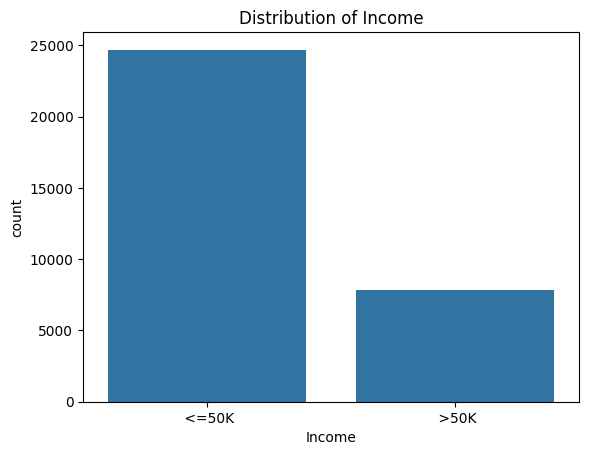

In [29]:
# Distributio of Income
print(round(df['Income'].value_counts()/df.shape[0]*100,2).astype('str') + ' %')
sns.countplot(x='Income',data=df)
plt.title('Distribution of Income')
plt.show()

Count of Income less than equal to 50k is higher than greater than 50k. Because it is our class variable we have class imbalance problem.

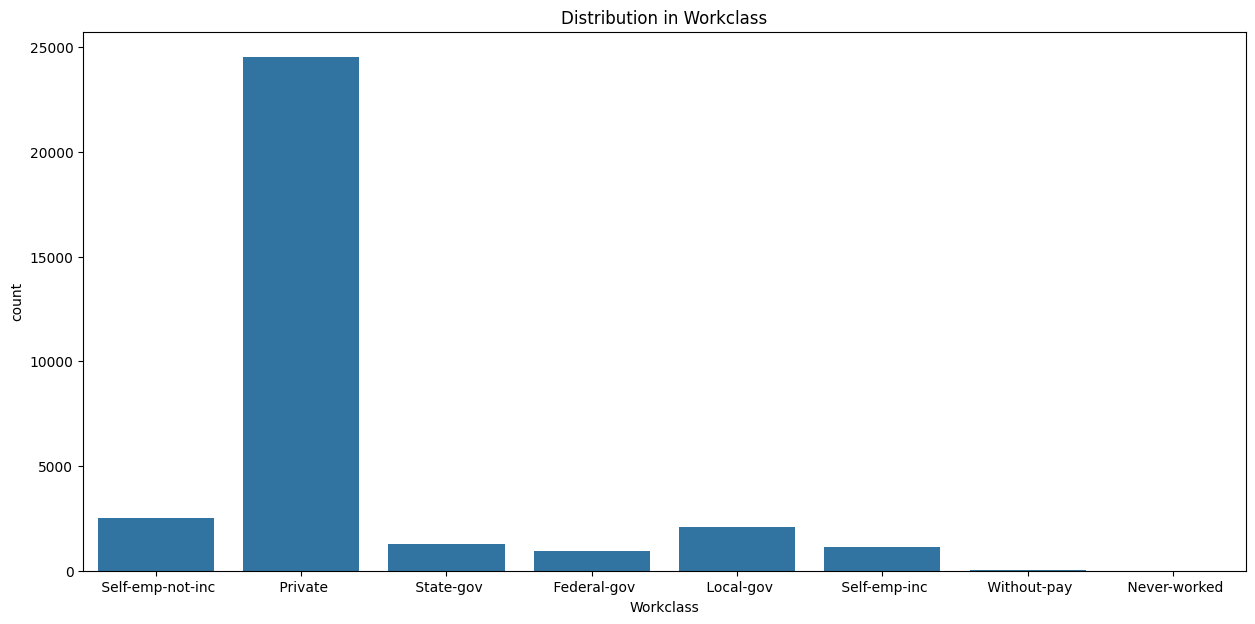

In [31]:
# Distribution of Workclass
plt.figure(figsize=(15,7))
sns.countplot(x='Workclass',data=df)
plt.title('Distribution in Workclass')
plt.show()

Count of Private Workclass are higher than other workclass.

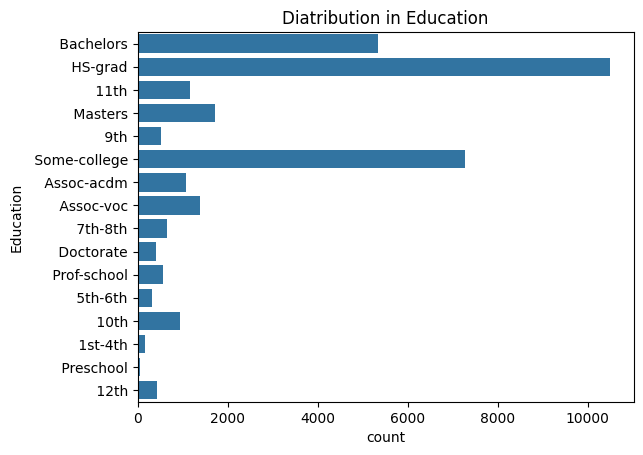

In [32]:
# Distribution in Education
sns.countplot(y='Education',data=df)
plt.title('Diatribution in Education')
plt.show()

Count of HS-grad Education is higher than other education fields.

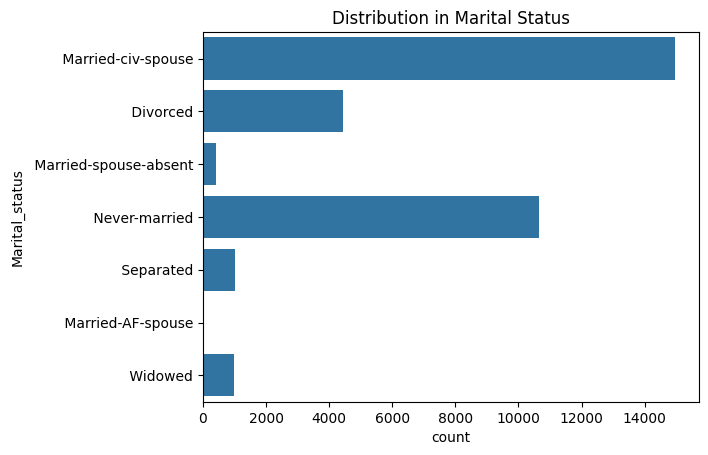

In [33]:
# Distribution in Marital Status
sns.countplot(y='Marital_status',data=df)
plt.title('Distribution in Marital Status')
plt.show()

Count of Married-civ-spouse is higher than other marital Status

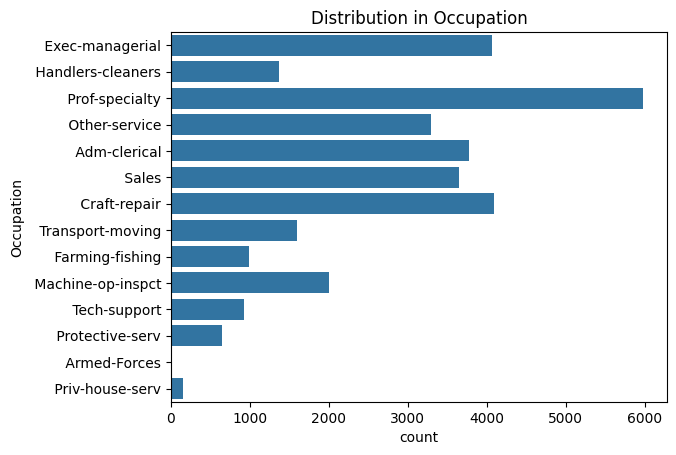

In [35]:
# Distribution in Occupation
sns.countplot(y='Occupation',data=df)
plt.title('Distribution in Occupation')
plt.show()

Count of Prof-specialty is higher than other Occupation

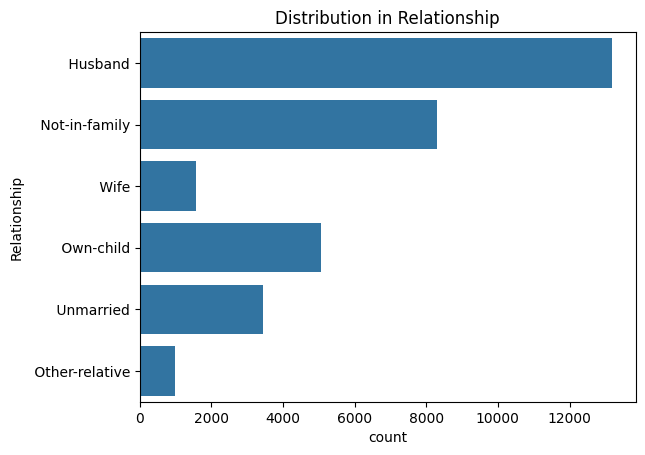

In [36]:
# Distribution in Relationship
sns.countplot(y='Relationship',data=df)
plt.title('Distribution in Relationship')
plt.show()

Count of Husband is higher than other relationship.

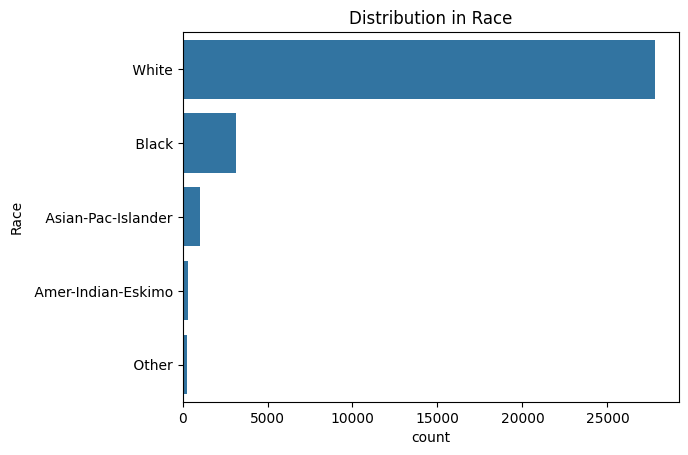

In [41]:
# Distribution in Race
sns.countplot(y='Race',data=df)
plt.title('Distribution in Race')
plt.show()

Count of white is higher than other Races.

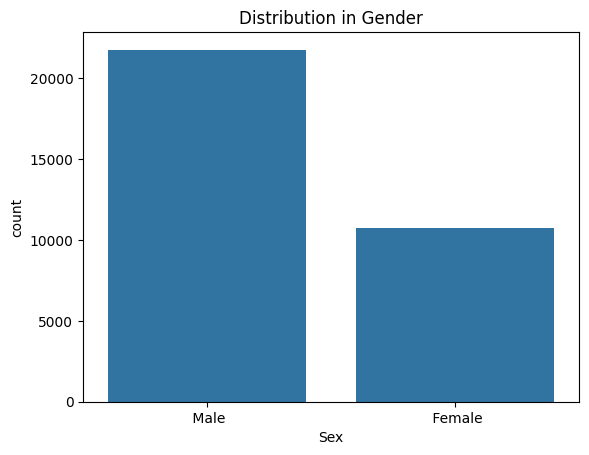

In [42]:
# Distribution in Gender
sns.countplot(x='Sex',data=df)
plt.title('Distribution in Gender')
plt.show()

Count of Male is higher than female.

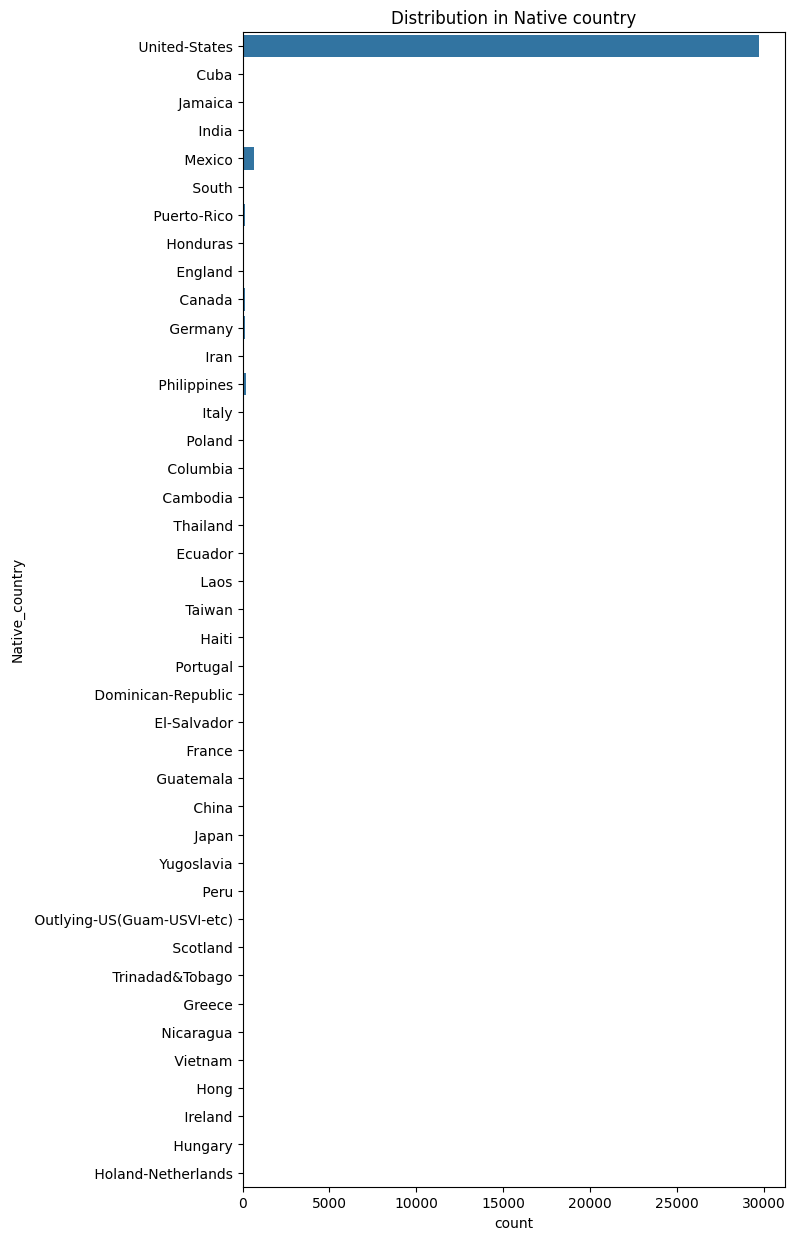

In [44]:
# Distribution in Native country
plt.figure(figsize=(7,15))
sns.countplot(y='Native_country',data=df)
plt.title('Distribution in Native country')
plt.show()

Count of United States is highest than other native countries.

In [45]:
# Numerical column
num_column=[]
for column in df.columns:
    if df[column].dtype!='object':
        num_column.append(column)

print(len(num_column))

6


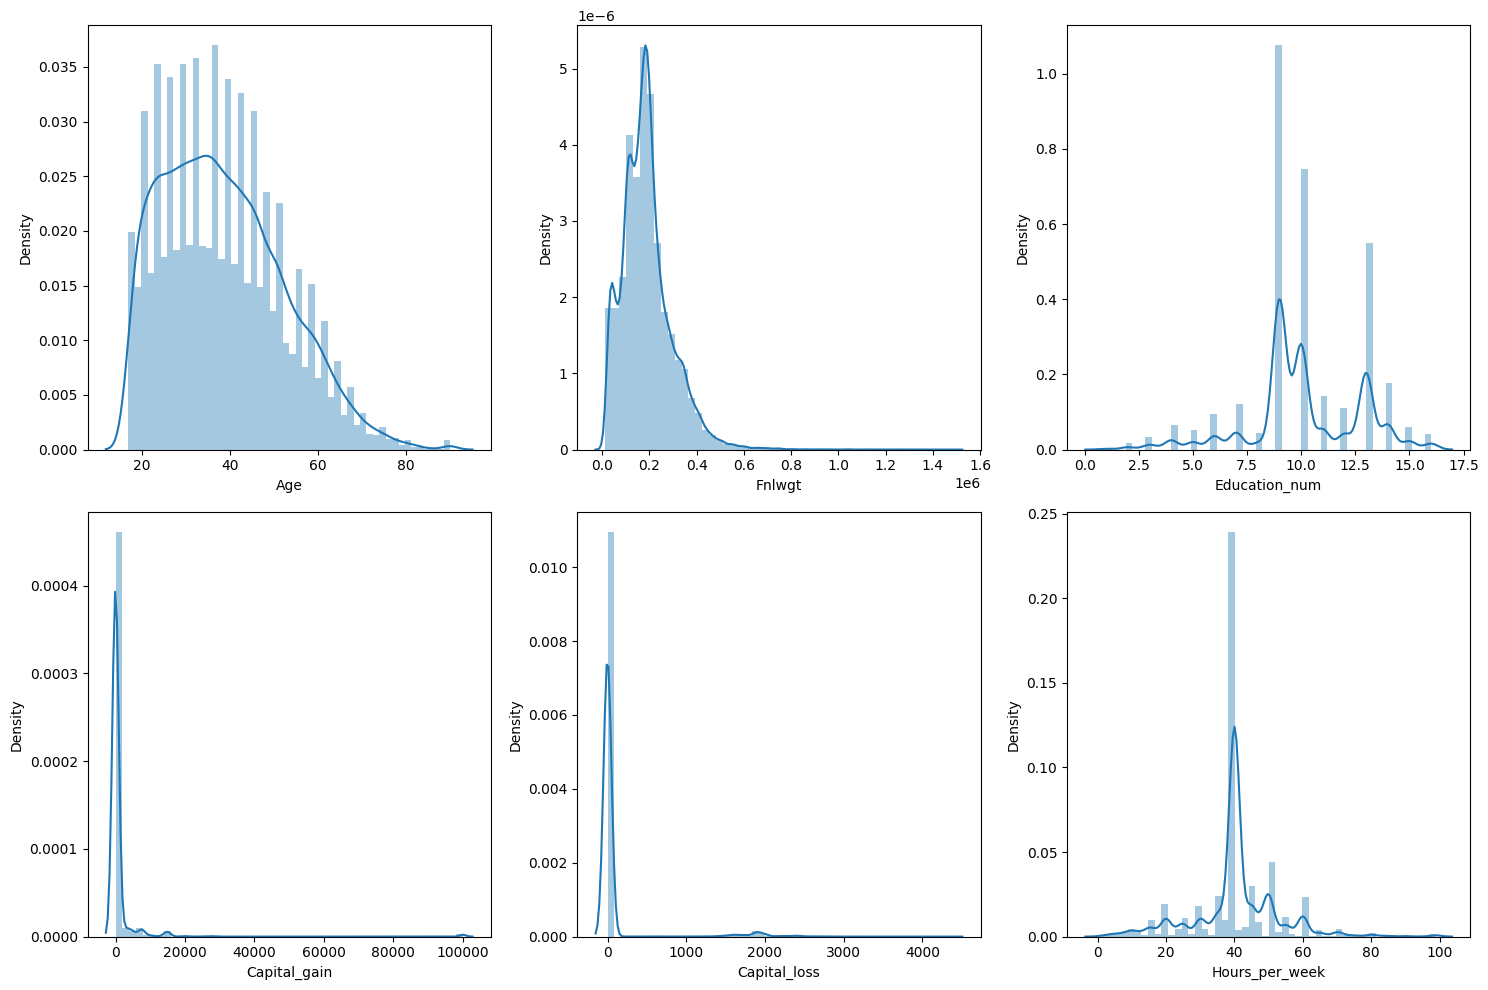

In [47]:
# Distribution in numerical columns
plt.figure(figsize=(15,10))
plot=1
for column in num_column:
    if plot<=len(num_column):
        subplt=plt.subplot(2,3,plot)
        sns.distplot(df[column])
        plt.xlabel(column)
    plot+=1
plt.tight_layout()

1) Age , Fnlwgt, Capital_gain and Capital loss has Right skewed distribution.
2) Education_num and Hours_per_week has normally distributed data.

Bivariate

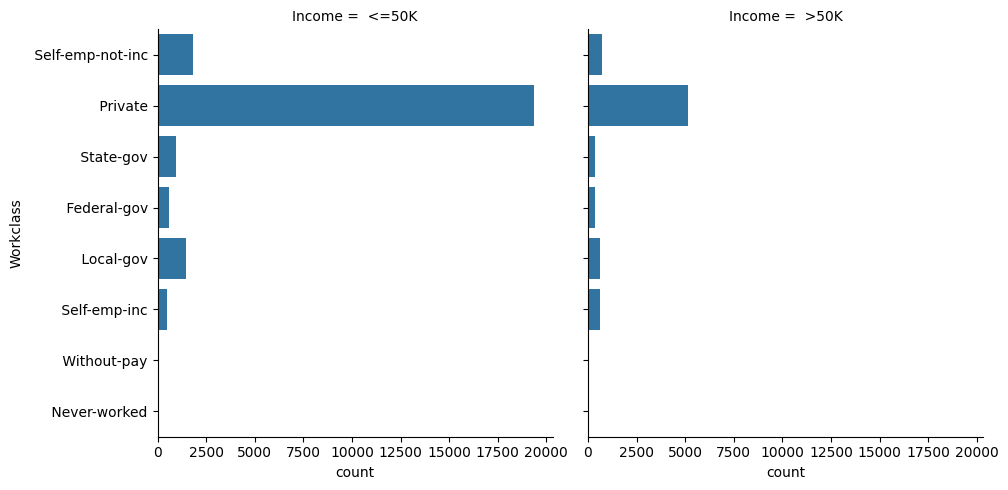

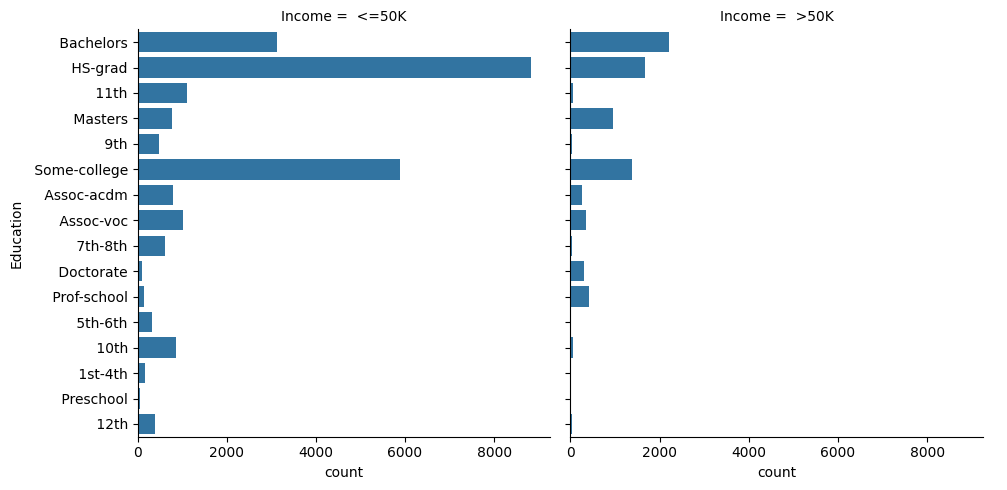

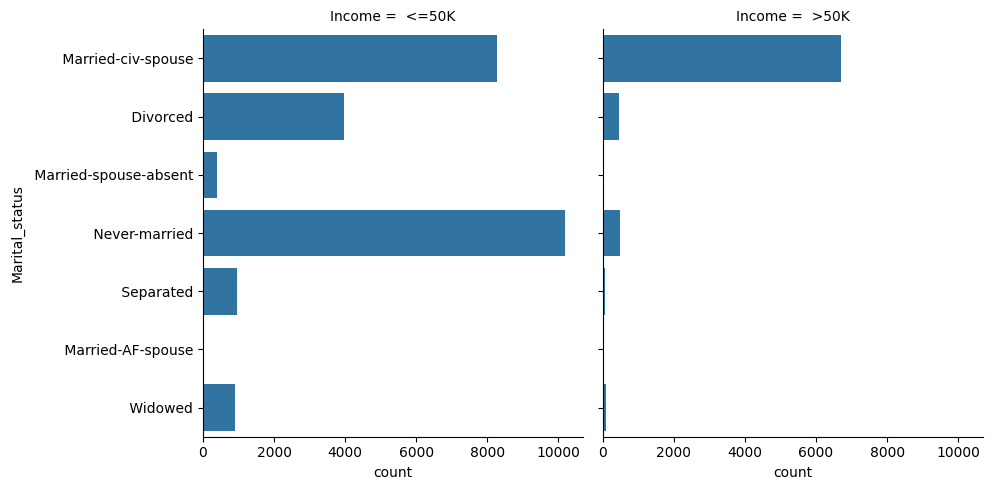

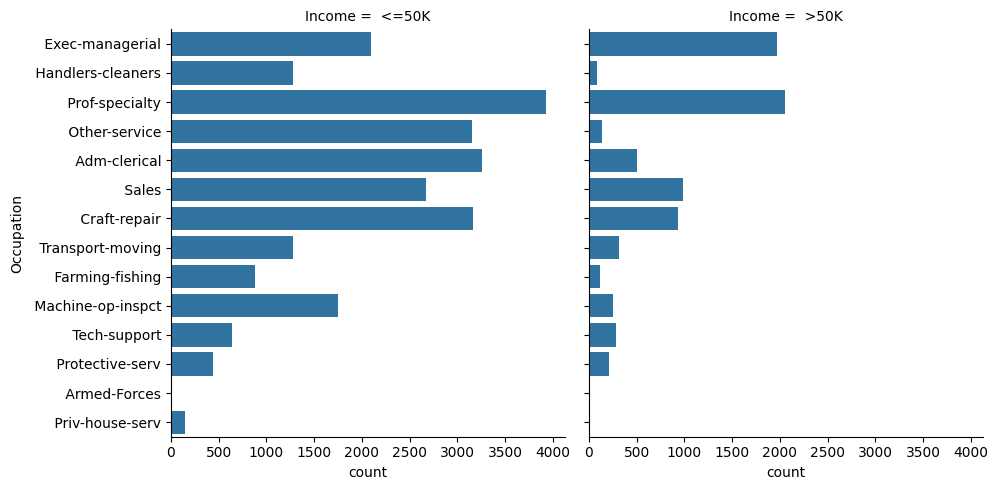

In [49]:
# Checking income level in Workclass
sns.catplot(y='Workclass',col='Income',data=df,kind='count')

# Checking income level in Education
sns.catplot(y='Education',col='Income',data=df,kind='count')

# Checking income level in Marital Status
sns.catplot(y='Marital_status',col='Income',data=df,kind='count')

# Checking income level in Occupation
sns.catplot(y='Occupation',col='Income',data=df,kind='count')
plt.show()

1) Private workclass has most number of people earning <= 50k and also has most number of people earning >50k.
2) HS-grad education has most number of people earning <= 50k and BAchelors has most number people earning >50k.
3) Never married marital status has most number of people earning <=50k and Married civ spouse has most number of people earning >50k.
4) Prof-speciality has most number of people earning <=50k and also earning >50k.

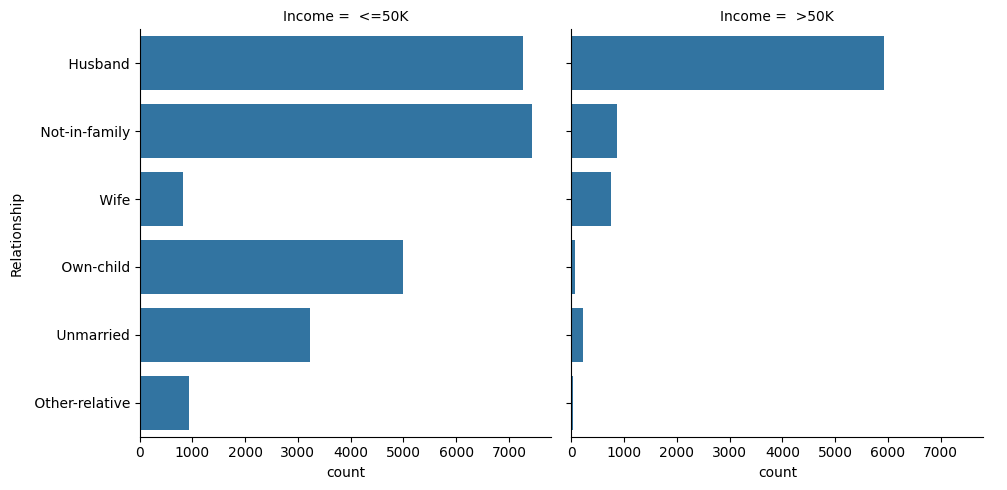

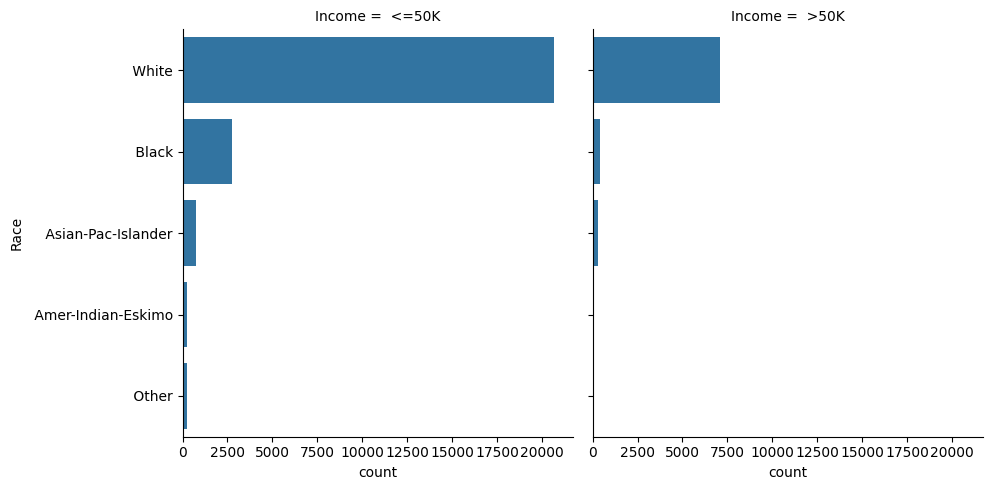

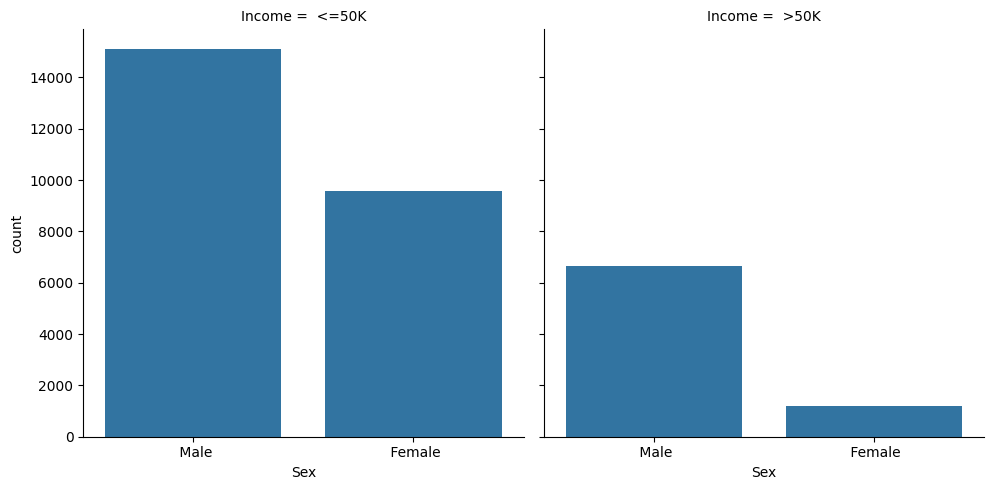

In [51]:
# Checking Income level in Relationship
sns.catplot(y='Relationship',col='Income',data=df,kind='count')

# Checking Income level in Race
sns.catplot(y='Race',col='Income',data=df,kind='count')

# Checking Income level in gender
sns.catplot(x='Sex',col='Income',data=df,kind='count')
plt.show()

1) Not in family relationship has most count of people earning <=50k and Husband has most number of people earning >50k.
2) White people has most count of earning <=50k also earning >50k.
3) Male has most count of Earning <=50k also earning >50k

# Outliers

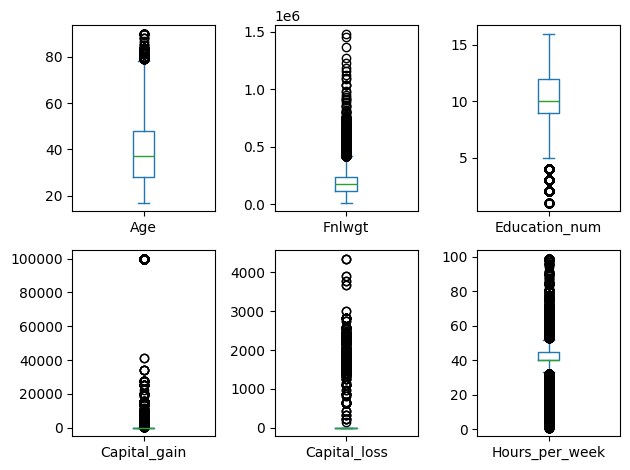

In [52]:
# Plotting boxplot to check outliers
df.plot(kind='box',subplots=True,layout=(2,3))
plt.tight_layout()

Outliers are present in Age, Fnlwgt, Education_num, Capital_gain, Capital loss and Hours_per week.

In [53]:
# Importing Zscore
from scipy.stats import zscore

In [54]:
# Z
z=np.abs(zscore(df[['Age','Fnlwgt','Education_num','Capital_gain','Capital_loss','Hours_per_week']]))

In [55]:
# Threshold =3
print(np.where(z>3))

(array([    9,    22,    27, ..., 32500, 32500, 32506], dtype=int64), array([5, 4, 5, ..., 0, 5, 5], dtype=int64))


In [83]:
# Removing outliers
dfn=df[np.abs(z<3).all(axis=1)]

In [84]:
# Data loss percentage due to outliers
round((df.shape[0]-dfn.shape[0])/df.shape[0]*100,2)

8.38

8.38 % data lost due to outliers.

# Encoding

In [85]:
# Creating Encoding function
def encoding(data):
    from sklearn.preprocessing import LabelEncoder
    for column in data.columns:
        if data[column].dtype=='object':
            data[column]=LabelEncoder().fit_transform(data[column])
    return data

In [86]:
dfn.dtypes

Age                int64
Workclass         object
Fnlwgt             int64
Education         object
Education_num      int64
Marital_status    object
Occupation        object
Relationship      object
Race              object
Sex               object
Capital_gain       int64
Capital_loss       int64
Hours_per_week     int64
Native_country    object
Income            object
dtype: object

In [87]:
# Encoding data
encoding(dfn)

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,5,83311,8,13,2,3,0,4,1,0,0,13,37,0
1,38,3,215646,10,9,0,5,1,4,1,0,0,40,37,0
2,53,3,234721,1,7,2,5,0,2,1,0,0,40,37,0
3,28,3,338409,8,13,2,9,5,2,0,0,0,40,4,0
4,37,3,284582,11,14,2,3,5,4,0,0,0,40,37,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,27,3,257302,6,12,2,12,5,4,0,0,0,38,37,0
32556,40,3,154374,10,9,2,6,0,4,1,0,0,40,37,1
32557,58,3,151910,10,9,6,0,4,4,0,0,0,40,37,0
32558,22,3,201490,10,9,4,0,3,4,1,0,0,20,37,0


In [88]:
dfn.dtypes

Age               int64
Workclass         int32
Fnlwgt            int64
Education         int32
Education_num     int64
Marital_status    int32
Occupation        int32
Relationship      int32
Race              int32
Sex               int32
Capital_gain      int64
Capital_loss      int64
Hours_per_week    int64
Native_country    int32
Income            int32
dtype: object

# Correlation

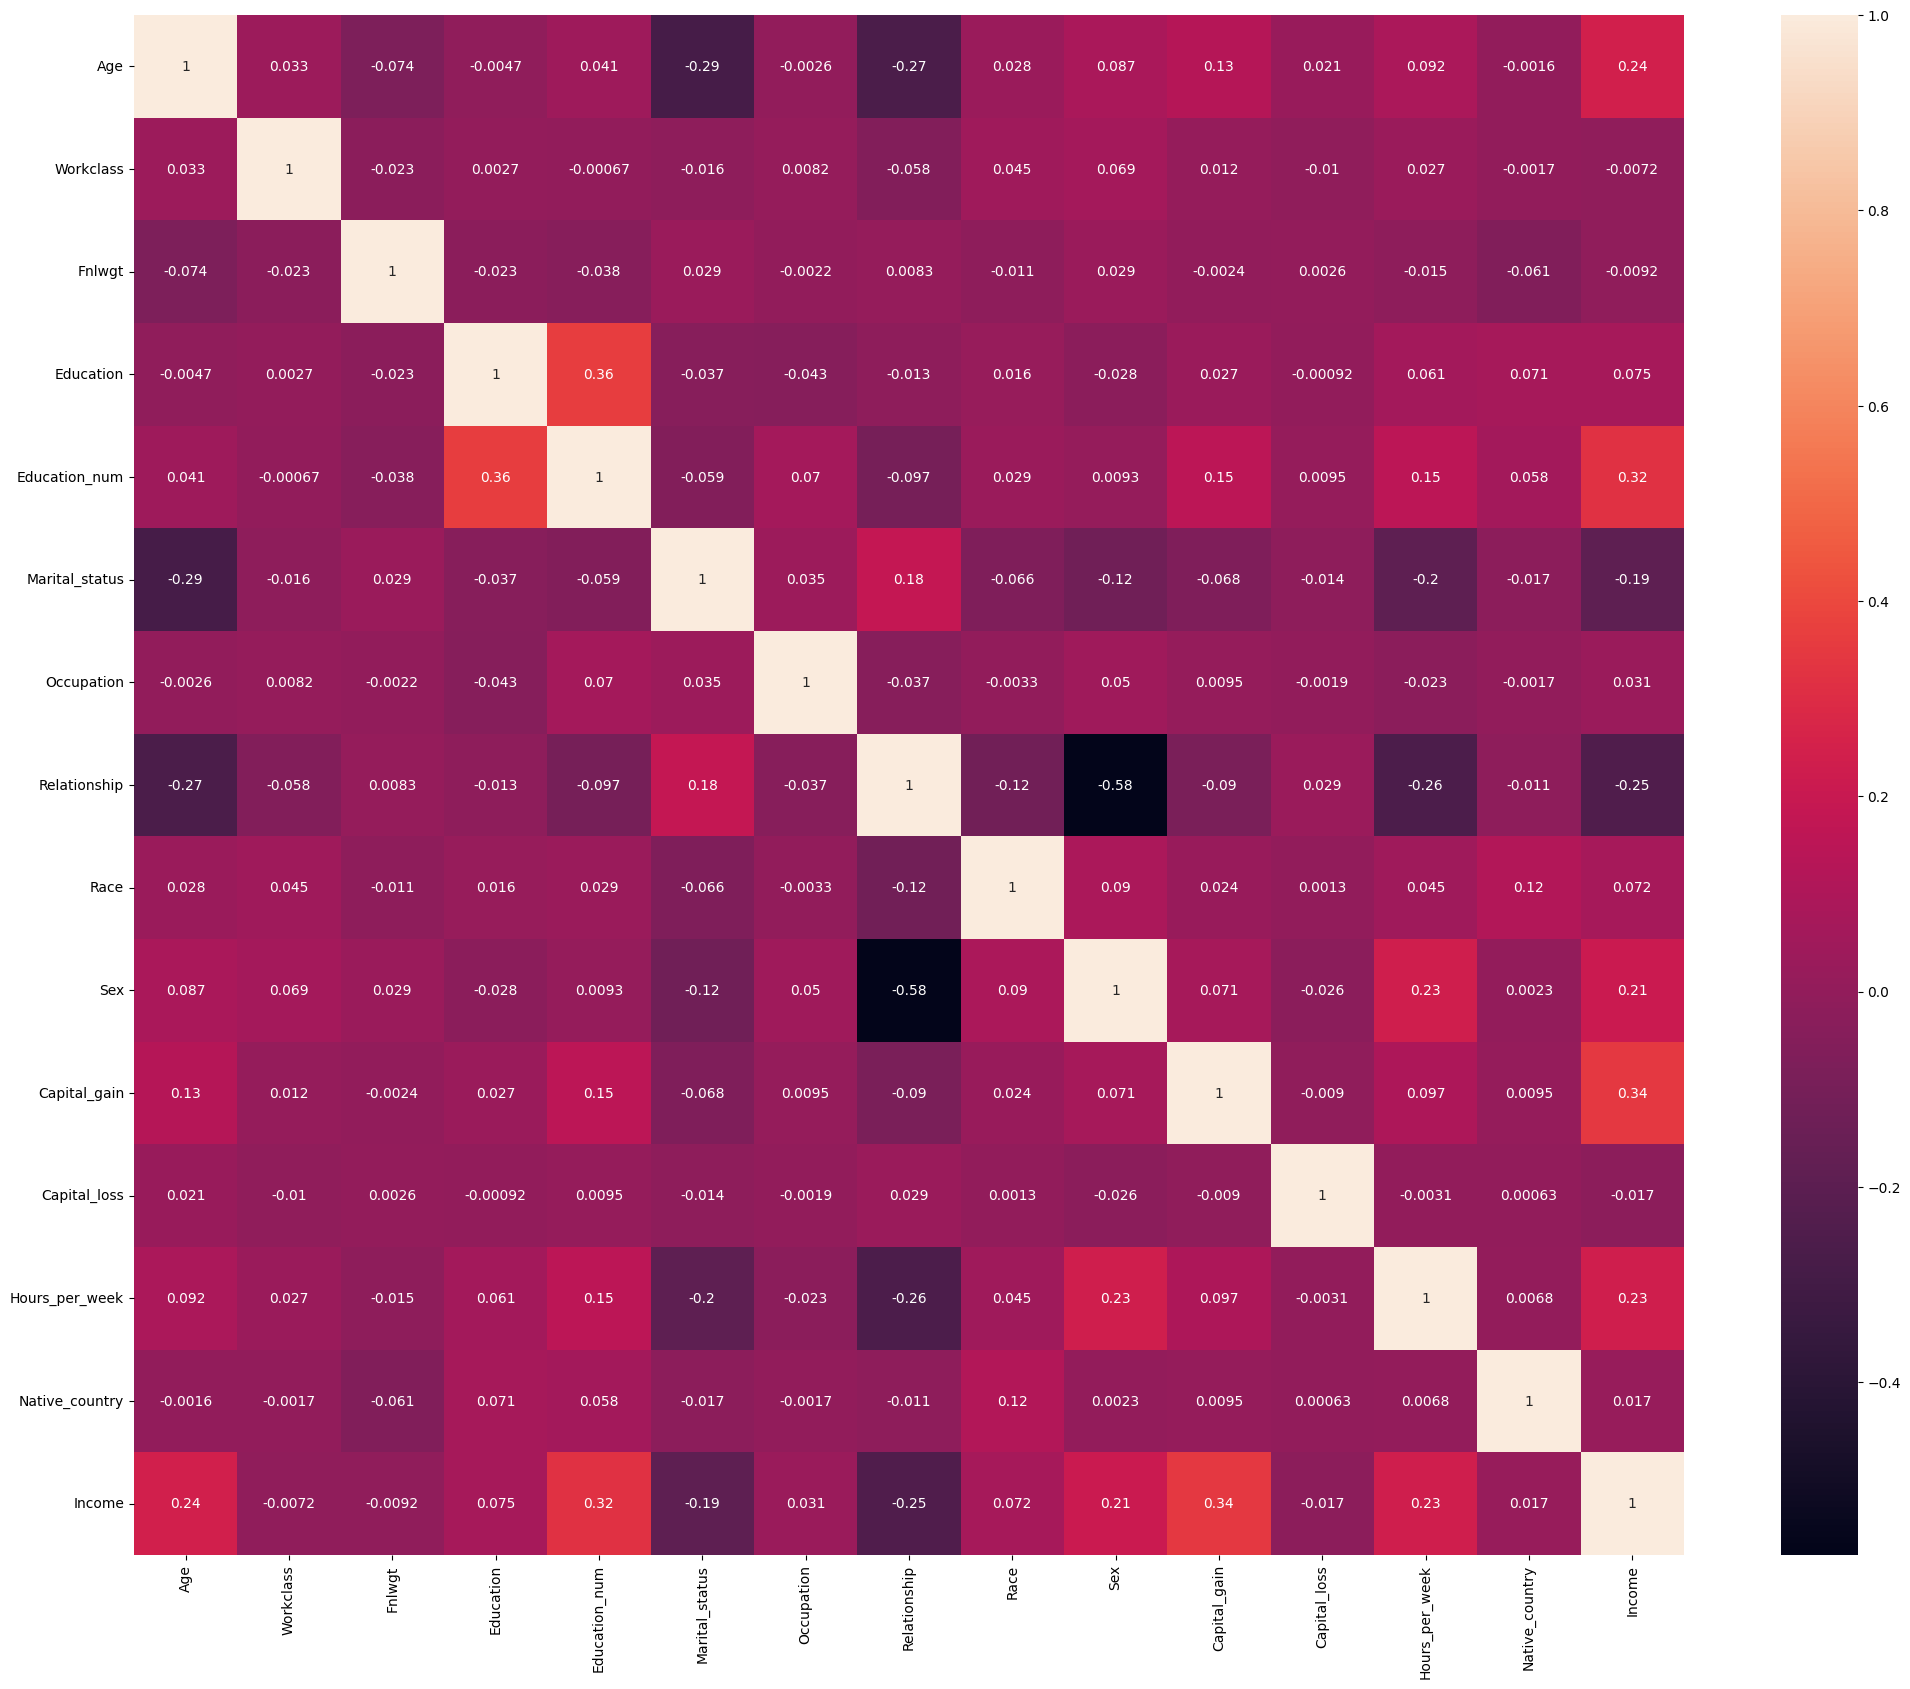

In [89]:
# Visualizing correlation using heatmap
plt.figure(figsize=(25,20))
sns.heatmap(dfn.corr(),annot=True)
plt.show()

Workclass, Fnlwgt, Marital_status, Capital_loss and Native country has least correlation with Target variable.

In [90]:
# Dropping least correlated column
dfn.drop(columns={'Workclass','Fnlwgt','Marital_status','Capital_loss','Native_country'},inplace=True)

In [91]:
dfn.shape

(29808, 10)

# Skewness

In [92]:
# Checking Skewness
dfn.skew()

Age               0.491125
Education        -1.073330
Education_num    -0.169811
Occupation        0.005568
Relationship      0.743548
Race             -2.435806
Sex              -0.679933
Capital_gain      4.941892
Hours_per_week   -0.353124
Income            1.329852
dtype: float64

In [93]:
# Importing PowerTransformer
from sklearn.preprocessing import PowerTransformer

In [94]:
# Removing skewness
dfn[['Capital_gain']]=PowerTransformer().fit_transform(dfn[['Capital_gain']])

In [95]:
dfn.skew()

Age               0.491125
Education        -1.073330
Education_num    -0.169811
Occupation        0.005568
Relationship      0.743548
Race             -2.435806
Sex              -0.679933
Capital_gain      3.072803
Hours_per_week   -0.353124
Income            1.329852
dtype: float64

In [96]:
dfn.isnull().sum()

Age               0
Education         0
Education_num     0
Occupation        0
Relationship      0
Race              0
Sex               0
Capital_gain      0
Hours_per_week    0
Income            0
dtype: int64

Splitting X and Y data

In [97]:
# Splitting input and Target variable
x=dfn.drop(columns={'Income'})
y=dfn['Income']

# Scaling

In [98]:
# Importing Standard Scaler
from sklearn.preprocessing import StandardScaler

In [99]:
# Scaling input data
x=pd.DataFrame(StandardScaler().fit_transform(x),columns=x.columns)
x

,Age,Education,Education_num,Occupation,Relationship,Race,Sex,Capital_gain,Hours_per_week
0,0.887304,-0.340122,1.191227,-0.780453,-0.919032,0.393999,0.716254,-0.296786,-2.415235
1,-0.011046,0.249488,-0.439623,-0.278831,-0.297940,0.393999,0.716254,-0.296786,0.009070
2,1.111891,-2.403756,-1.255048,-0.278831,-0.919032,-1.956981,0.716254,-0.296786,0.009070
3,-0.759670,-0.340122,1.191227,0.724414,2.186429,-1.956981,-1.396153,-0.296786,0.009070
4,-0.085908,0.544293,1.598939,-0.780453,2.186429,0.393999,-1.396153,-0.296786,0.009070
...,...,...,...,...,...,...,...,...,...
29803,-0.834532,-0.929731,0.783514,1.476848,2.186429,0.393999,-1.396153,-0.296786,-0.170508
29804,0.138679,0.249488,-0.439623,-0.028019,-0.919032,0.393999,0.716254,-0.296786,0.009070
29805,1.486203,0.249488,-0.439623,-1.532886,1.565337,0.393999,-1.396153,-0.296786,0.009070
29806,-1.208844,0.249488,-0.439623,-1.532886,0.944244,0.393999,0.716254,-0.296786,-1.786711


# VIF

In [100]:
# Creating Vif function
def vif(data):
    from statsmodels.stats.outliers_influence import variance_inflation_factor
    vif=pd.DataFrame()
    vif['Columns']=data.columns
    vif['VIF']=[variance_inflation_factor(data.values,i) for i in range(len(data.columns))]
    return vif

In [101]:
# Checking vif
vif(x)

,Columns,VIF
0,Age,1.098260
1,Education,1.158252
2,Education_num,1.203185
3,Occupation,1.014884
4,Relationship,1.667929
5,Race,1.015309
6,Sex,1.543659
7,Capital_gain,1.030462
8,Hours_per_week,1.110185


No multicolinearity is present in the dataset.

# Class imbalance

In [102]:
# Importing SMOTE
from imblearn.over_sampling import SMOTE

In [103]:
y.value_counts()

Income
0    23156
1     6652
Name: count, dtype: int64

In [104]:
# Balancing Class variable
x1,y1=SMOTE().fit_resample(x,y)

In [105]:
y1.value_counts()

Income
0    23156
1    23156
Name: count, dtype: int64

Class Balanced.

# Random State

In [106]:
# Creating random state function
def random_state(model,x,y):
    from sklearn.model_selection import train_test_split
    from sklearn.metrics import accuracy_score
    rs=0
    acc=0
    for i in range(1,300):
        x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=i)
        model.fit(x_train,y_train)
        accu=accuracy_score(y_test,model.predict(x_test))
        if accu>acc:
            acc=accu
            rs=i
    print('best accuracy of {} at random_state {}.'.format(round(acc*100,2),rs))

In [108]:
# Importing Classification model
from sklearn.ensemble import RandomForestClassifier

In [109]:
# Searching best random state
random_state(RandomForestClassifier(),x1,y1)

best accuracy of 88.38 at random_state 249.


In [110]:
# Importing classification metrics
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [111]:
# Splitting train test data
xtrain,xtest,ytrain,ytest=train_test_split(x1,y1,test_size=0.30,random_state=249)

In [112]:
# Importing classification models
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier, ExtraTreesClassifier, BaggingClassifier

In [113]:
# Model variables
LR=LogisticRegression()
DTC=DecisionTreeClassifier()
GNB=GaussianNB()
KNC=KNeighborsClassifier()
SVC=SVC()
ABC=AdaBoostClassifier()
GBC=GradientBoostingClassifier()
ETC=ExtraTreesClassifier()
BGC=BaggingClassifier()
RFC=RandomForestClassifier()

In [114]:
# list
models=[LR,
       DTC,
       GNB,
       KNC,
       SVC,
       ABC,
       GBC,
       ETC,
       BGC,
       RFC]

In [115]:
# Checking each model performance
for model in models:
    model.fit(xtrain,ytrain)
    pred=model.predict(xtest)
    accur=accuracy_score(ytest,pred)
    print(model)
    print(round(accur*100,2))
    print(confusion_matrix(ytest,pred))
    print(classification_report(ytest,pred))
    print("CVSCORE")
    cvscore=cross_val_score(model,x1,y1)
    print(cvscore)
    print(cvscore.mean())
    print('Difference between Acuracy score and CV mean Score for model {} is'.format(model),round(accur*100-cvscore.mean()*100,2))
    print('*'*100)
    print('\n')

LogisticRegression()
76.46
[[5194 1701]
 [1570 5429]]
              precision    recall  f1-score   support

           0       0.77      0.75      0.76      6895
           1       0.76      0.78      0.77      6999

    accuracy                           0.76     13894
   macro avg       0.76      0.76      0.76     13894
weighted avg       0.76      0.76      0.76     13894

CVSCORE
[0.75126849 0.75601857 0.76257828 0.76009501 0.76268624]
0.758529317921485
Difference between Acuracy score and CV mean Score for model LogisticRegression() is 0.6
****************************************************************************************************


DecisionTreeClassifier()
85.52
[[5953  942]
 [1070 5929]]
              precision    recall  f1-score   support

           0       0.85      0.86      0.86      6895
           1       0.86      0.85      0.85      6999

    accuracy                           0.86     13894
   macro avg       0.86      0.86      0.86     13894
weighted avg  

ExtraTreesClassifier is giving Highest accuracy score of 88.28 % and also have very little difference of -0.18 between Accuracy score and cv score.Hence it is our best performing model.

In [116]:
# Best performing model
ETC

ExtraTreesClassifier()

# Hyperparameter Tunning

In [118]:
# Importing GridsearchCV
from sklearn.model_selection import GridSearchCV

In [119]:
# Creating parameters dictionary
parameters={'n_estimators':[100,150,200,250,300],
           'criterion':['gini','entropy','log_loss'],
           'max_features':['sqrt','log2',None],
           'class_weight':['balanced','balanced_subsample']}

In [120]:
# Sending model and parameters in gridsearchcv for tunning
gscv=GridSearchCV(ETC,parameters)

In [121]:
# finding best parameters
gscv.fit(xtrain,ytrain)

GridSearchCV(estimator=ExtraTreesClassifier(),
             param_grid={'class_weight': ['balanced', 'balanced_subsample'],
                         'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_features': ['sqrt', 'log2', None],
                         'n_estimators': [100, 150, 200, 250, 300]})

In [122]:
# parameters
gscv.best_params_

{'class_weight': 'balanced_subsample',
 'criterion': 'log_loss',
 'max_features': None,
 'n_estimators': 250}

In [123]:
# Building model with tunned parameters
ModelETC=ExtraTreesClassifier(class_weight='balanced_subsample',
                             criterion='log_loss',
                             max_features=None,
                             n_estimators=250)

In [124]:
# training model
ModelETC.fit(xtrain,ytrain)

ExtraTreesClassifier(class_weight='balanced_subsample', criterion='log_loss',
                     max_features=None, n_estimators=250)

In [126]:
# accuracy score of model with tunned parameters
print(round(accuracy_score(ytest,ModelETC.predict(xtest))*100,2))

88.18


In [127]:
# Accuracy_score of model with default parameters
print(round(accuracy_score(ytest,ETC.predict(xtest))*100,2))

88.28


Model with default parameters is performing little better than model with tunned parameters, so going to save model with default parameters.

In [129]:
SaveETC=ExtraTreesClassifier()

In [130]:
SaveETC.fit(xtrain,ytrain)

ExtraTreesClassifier()

In [131]:
Savepred=SaveETC.predict(xtest)

# Auc roc curve

In [132]:
# importing libraries
from sklearn.metrics import auc, roc_curve, RocCurveDisplay

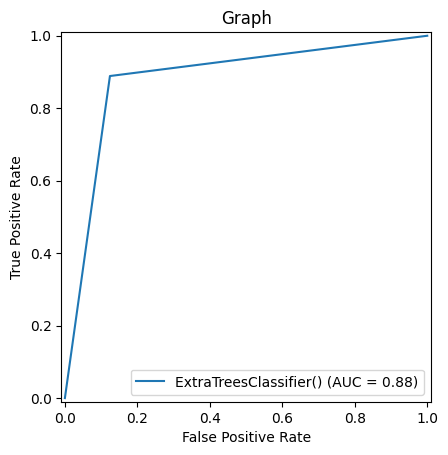

In [133]:
# Plotting auc roc curve
fpr,tpr,thresholds=roc_curve(ytest,Savepred)
roc_auc=auc(fpr,tpr)
display=RocCurveDisplay(fpr=fpr,tpr=tpr,roc_auc=roc_auc,estimator_name=SaveETC)
display.plot()
plt.title('Graph')
plt.show()

# Saving best model

In [134]:
# Importing pickel
import pickle

In [135]:
filename='census_income.pkl'

In [136]:
# Saving best model
pickle.dump(SaveETC,open(filename,'wb'))